In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [2]:
iris_obj = load_iris()
flower, species = iris_obj.data, iris_obj.target

In [3]:
flower_train, flower_test, species_train, species_test = train_test_split(flower, species, test_size = 0.1)
flower_train[:5]

array([[6.9, 3.2, 5.7, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.8, 2.6, 4. , 1.2]])

In [4]:
species_train[:5]

array([2, 1, 1, 1, 1])

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [6]:
knn1 = KNeighborsClassifier(n_neighbors=1)    # Setting the k parameter
knn1.fit(flower_train, species_train)    # Fitting the model
knn1.predict(np.array([[7, 3, 5, 2]]))    # A test prediction

array([2])

In [7]:
pred1 = knn1.predict(flower_train)
pred1

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1, 2])

In [8]:
print(classification_report(species_train, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        48

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [9]:
import pandas as pd
from pandas import DataFrame

In [10]:
k_candidate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = dict()

for k in k_candidate:
    pred2 = KNeighborsClassifier(n_neighbors=k)
    res[k] = cross_validate(estimator=pred2,    # The predictor
                            X=flower_train,     # Features array
                            y=species_train,    # Target array
                            cv=10,              # Number of folds (but other meanings exist)
                            return_train_score=False,    # Don't return training scores
                            scoring='accuracy') # What scores to return (other meanings exist)

In [11]:
resdf = DataFrame({(i, j): res[i][j]
                             for i in res.keys()
                             for j in res[i].keys()}).T
resdf

0         1         2         3         4         5  \
1  fit_time    0.000999  0.001002  0.000997  0.000999  0.001000  0.000000   
   score_time  0.002000  0.000998  0.002018  0.001997  0.001978  0.001996   
   test_score  1.000000  0.933333  0.933333  0.928571  1.000000  1.000000   
2  fit_time    0.001002  0.002010  0.000999  0.000999  0.000998  0.000000   
   score_time  0.000996  0.002010  0.000996  0.001001  0.001000  0.000999   
   test_score  1.000000  0.866667  0.933333  0.928571  1.000000  1.000000   
3  fit_time    0.000999  0.001000  0.000000  0.000000  0.000000  0.000999   
   score_time  0.001000  0.000999  0.001999  0.000999  0.001000  0.001000   
   test_score  1.000000  0.933333  0.933333  0.928571  1.000000  1.000000   
4  fit_time    0.000999  0.000000  0.000000  0.000000  0.000000  0.000000   
   score_time  0.001000  0.001999  0.001999  0.001998  0.000999  0.000999   
   test_score  1.000000  0.933333  0.933333  0.928571  1.000000  1.000000   
5  fit_time    0.000000  0.000999  0.000999  0.000000  0.000000  0.000000   
   score_time  0.001000  0.001000  0.000999  0.001999  0.000999  0.000999   
   test_score  1.000000  0.933333  0.933333  0.928571  1.000000  1.000000   
6  fit_time    0.000000  0.001000  0.001000  0.000999  0.000000  0.000000   
   score_time  0.001000  0.001000  0.000999  0.001000  0.001999  0.000999   
   test_score  1.000000  0.933333  0.933333  0.928571  1.000000  1.000000   
7  fit_time    0.000000  0.000000  0.000000  0.000000  0.000000  0.000999   
   score_time  0.002002  0.001996  0.001000  0.001000  0.001000  0.001001   
   test_score  1.000000  0.933333  0.933333  1.000000  1.000000  1.000000   
8  fit_time    0.001003  0.000999  0.001000  0.001000  0.001000  0.000999   
   score_time  0.002999  0.002999  0.002997  0.002998  0.001999  0.001999   
   test_score  1.000000  0.866667  0.933333  1.000000  1.000000  1.000000   
9  fit_time    0.001004  0.000000  0.000980  0.000000  0.000999  0.000000   
   score_time  0.000999  0.002014  0.002016  0.002000  0.000999  0.001999   
   test_score  1.000000  0.866667  0.933333  1.000000  1.000000  1.000000   
10 fit_time    0.001000  0.000999  0.000000  0.000999  0.000000  0.000000   
   score_time  0.001000  0.001000  0.001999  0.000999  0.000999  0.002000   
   test_score  1.000000  0.933333  0.866667  1.000000  1.000000  1.000000   

                      6         7         8         9  
1  fit_time    0.000000  0.000998  0.000000  0.000000  
   score_time  0.001994  0.000999  0.002000  0.002002  
   test_score  0.846154  1.000000  0.916667  1.000000  
2  fit_time    0.000000  0.000999  0.000999  0.001032  
   score_time  0.001000  0.000999  0.000999  0.000969  
   test_score  0.846154  1.000000  0.916667  0.916667  
3  fit_time    0.000998  0.000000  0.001000  0.000999  
   score_time  0.000980  0.000999  0.000999  0.000999  
   test_score  0.846154  0.923077  0.916667  1.000000  
4  fit_time    0.001000  0.000999  0.000000  0.001000  
   score_time  0.000999  0.000999  0.001000  0.000999  
   test_score  0.846154  1.000000  0.916667  1.000000  
5  fit_time    0.000999  0.000999  0.000000  0.000000  
   score_time  0.000999  0.001000  0.000999  0.001000  
   test_score  0.846154  0.923077  1.000000  1.000000  
6  fit_time    0.000999  0.000999  0.000000  0.000000  
   score_time  0.000999  0.000999  0.001999  0.001000  
   test_score  0.846154  0.923077  0.916667  1.000000  
7  fit_time    0.000999  0.000000  0.000000  0.000000  
   score_time  0.000999  0.001000  0.001000  0.001020  
   test_score  0.846154  0.923077  1.000000  1.000000  
8  fit_time    0.001000  0.000000  0.000000  0.001001  
   score_time  0.001998  0.002975  0.001997  0.002001  
   test_score  0.923077  0.923077  0.916667  1.000000  
9  fit_time    0.000000  0.000999  0.000000  0.001000  
   score_time  0.001999  0.001001  0.001999  0.000999  
   test_score  0.846154  0.923077  1.000000  1.000000  
10 fit_time    0.000998  0.000999  0.000000  0.000000  
   score_t

In [12]:
resdf.loc[(slice(None), 'test_score'), :]

,,0,1,2,3,4,5,6,7,8,9
1,test_score,1.0,0.933333,0.933333,0.928571,1.0,1.0,0.846154,1.000000,0.916667,1.000000
2,test_score,1.0,0.866667,0.933333,0.928571,1.0,1.0,0.846154,1.000000,0.916667,0.916667
3,test_score,1.0,0.933333,0.933333,0.928571,1.0,1.0,0.846154,0.923077,0.916667,1.000000
4,test_score,1.0,0.933333,0.933333,0.928571,1.0,1.0,0.846154,1.000000,0.916667,1.000000
5,test_score,1.0,0.933333,0.933333,0.928571,1.0,1.0,0.846154,0.923077,1.000000,1.000000
6,test_score,1.0,0.933333,0.933333,0.928571,1.0,1.0,0.846154,0.923077,0.916667,1.000000
7,test_score,1.0,0.933333,0.933333,1.000000,1.0,1.0,0.846154,0.923077,1.000000,1.000000
8,test_score,1.0,0.866667,0.933333,1.000000,1.0,1.0,0.923077,0.923077,0.916667,1.000000
9,test_score,1.0,0.866667,0.933333,1.000000,1.0,1.0,0.846154,0.923077,1.000000,1.000000
10,test_score,1.0,0.933333,0.866667,1.000000,1.0,1.0,0.923077,0.923077,0.916667,1.000000


In [13]:
pred3 = KNeighborsClassifier(n_neighbors=8)
pred3.fit(flower_train, species_train)
species_test_predict = pred3.predict(flower_test)
print(classification_report(species_test, species_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

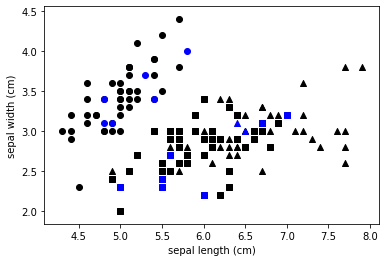

In [15]:
marker_map = {0: 'o', 1: 's', 2: '^'}
var1, var2 = 0, 1    # Sepal length and sepal width variables
for length, width, species in zip(flower_train[:, var1], flower_train[:, var2], species_train[:]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="black")
# Plot correct prediction
correct = (species_test == species_test_predict)
for length, width, species in zip(flower_test[correct, var1], flower_test[correct, var2], species_test[correct]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="blue")
for length, width, species in zip(flower_test[np.logical_not(correct), var1],
                                  flower_test[np.logical_not(correct), var2],
                                  species_test[np.logical_not(correct)]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="red")
plt.xlabel(iris_obj.feature_names[var1])
plt.ylabel(iris_obj.feature_names[var2])
plt.show()

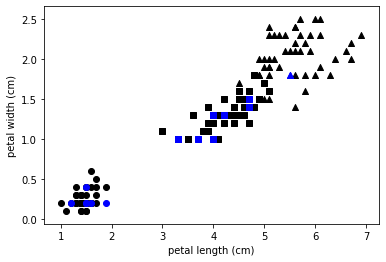

In [16]:
marker_map = {0: 'o', 1: 's', 2: '^'}
var1, var2 = 2, 3    # Petal length and petal width variables
for length, width, species in zip(flower_train[:, var1], flower_train[:, var2], species_train[:]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="black")
# Plot correct prediction
correct = (species_test == species_test_predict)
for length, width, species in zip(flower_test[correct, var1], flower_test[correct, var2], species_test[correct]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="blue")
for length, width, species in zip(flower_test[np.logical_not(correct), var1],
                                  flower_test[np.logical_not(correct), var2],
                                  species_test[np.logical_not(correct)]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="red")
plt.xlabel(iris_obj.feature_names[var1])
plt.ylabel(iris_obj.feature_names[var2])
plt.show()